Student Name: **Dinakar Vennalakanti**


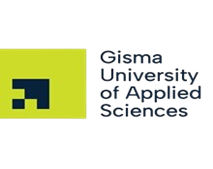

# **Geospatial Analysis and Visualization of Environmental Data**

## **Introduction**

As environmental factors increasingly influence ecological and human activities, understanding their dynamics becomes crucial. This project utilizes an environmental dataset to analyze various factors affecting water quality over the years, focusing specifically on the year 2015.To predict the Dissolved Oxygen (DO) levels using machine learning models based on other water quality indicators. We will start by importing required libraries for the data.

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import folium
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Description**

We initiated the project by loading the environmental dataset from a CSV file. This dataset includes various measurements such as temperature, salinity, pH, and others for multiple locations over several years. And then we will reduce data for 2015 year only.

In [ ]:
url = ('/content/drive/MyDrive/Practice Workbook - ML/PMECBoxCoresEnv (3).csv')
data = pd.read_csv(url)
data_2015 = data[data['Year'] == 2015]

In [ ]:
data_2015.head()

,DepthBin,Year,Month,Lon,Lat,Site,Depth (m),Penetration (cm),Temp (deg C),DO (mL/L),...,pH,Turbidity (NTU),Silt/Clay (%),Sand (%),MedianGS,PDO,NOI,MEI,Upwelling,Regime
500,30,2015,4,-124.0998,44.723300,1,32.0,8.5,11.62,5.57040,...,8.159,0.3806,1.04,98.96,192.564,1.44,0.631,0.953,7,1
501,40,2015,4,-124.1120,44.723617,1,41.0,12.0,10.53,4.28315,...,8.108,1.0286,0.00,100.00,346.204,1.44,0.631,0.953,7,1
502,50,2015,4,-124.1242,44.724233,1,51.0,9.0,9.95,3.87747,...,8.062,0.3651,0.00,100.00,248.767,1.44,0.631,0.953,7,1
503,30,2015,4,-124.1018,44.696683,1,32.0,9.0,11.66,5.66698,...,8.162,0.4217,0.77,99.23,210.668,1.44,0.631,0.953,7,1
504,40,2015,4,-124.1077,44.691533,1,41.0,8.0,10.73,4.18948,...,8.110,1.2017,0.00,100.00,387.794,1.44,0.631,0.953,7,1


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is performed to comprehend the distributions of variables, potential correlations, and any anomalies. Visualization tools aid in this evaluation.

In [ ]:
data_2015.describe()

,DepthBin,Year,Month,Lon,Lat,Site,Depth (m),Penetration (cm),Temp (deg C),DO (mL/L),...,pH,Turbidity (NTU),Silt/Clay (%),Sand (%),MedianGS,PDO,NOI,MEI,Upwelling,Regime
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0
mean,49.493671,2015.0,5.113924,-124.153465,44.625070,1.822785,50.118987,9.481013,8.723900,3.088186,...,7.872165,0.564830,0.200494,99.799506,331.919152,1.495696,-0.540848,1.520544,70.493671,1.0
std,11.972054,0.0,0.999838,0.045190,0.076863,0.746951,11.773472,1.701137,1.539424,1.042890,...,0.175822,0.307545,0.351514,0.351514,134.830606,0.049992,1.051829,0.509417,56.990749,0.0
min,30.000000,2015.0,4.000000,-124.253200,44.490300,1.000000,30.000000,6.000000,7.314400,1.826550,...,7.662000,0.312300,0.000000,98.690000,171.728000,1.440000,-1.473000,0.953000,7.000000,1.0
25%,40.000000,2015.0,4.000000,-124.200250,44.559450,1.000000,41.250000,8.500000,7.421400,2.360390,...,7.722500,0.443750,0.000000,99.650000,237.739500,1.440000,-1.473000,0.953000,7.000000,1.0
50%,45.000000,2015.0,6.000000,-124.128200,44.650667,2.000000,47.000000,9.500000,7.517900,2.578390,...,7.743000,0.474700,0.000000,100.000000,291.096000,1.540000,-1.473000,1.972000,121.000000,1.0
75%,60.000000,2015.0,6.000000,-124.124200,44.695250,2.000000,59.200000,10.000000,10.290000,3.861345,...,8.060000,0.594200,0.350000,100.000000,383.028500,1.540000,0.631000,1.972000,121.000000,1.0
max,70.000000,2015.0,6.000000,-124.099800,44.726333,3.000000,73.700000,16.000000,11.990000,6.236630,...,8.188000,2.846000,1.310000,100.000000,733.433000,1.540000,0.631000,1.972000,121.000000,1.0


In [ ]:
data_2015.dtypes

,0
DepthBin,int64
Year,int64
Month,int64
Lon,float64
Lat,float64
Site,int64
Depth (m),float64
Penetration (cm),float64
Temp (deg C),float64
DO (mL/L),float64


In [ ]:
data_2015.isnull().sum()

,0
DepthBin,0
Year,0
Month,0
Lon,0
Lat,0
Site,0
Depth (m),0
Penetration (cm),0
Temp (deg C),0
DO (mL/L),0


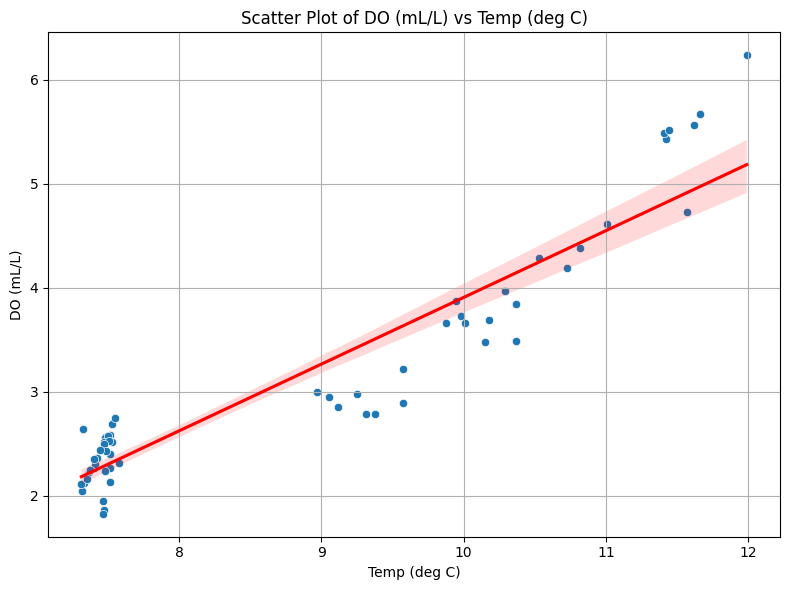

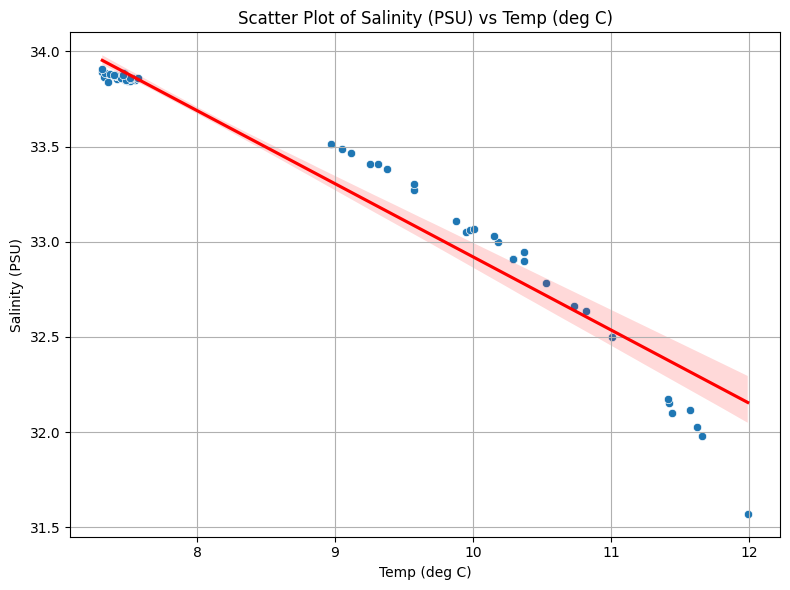

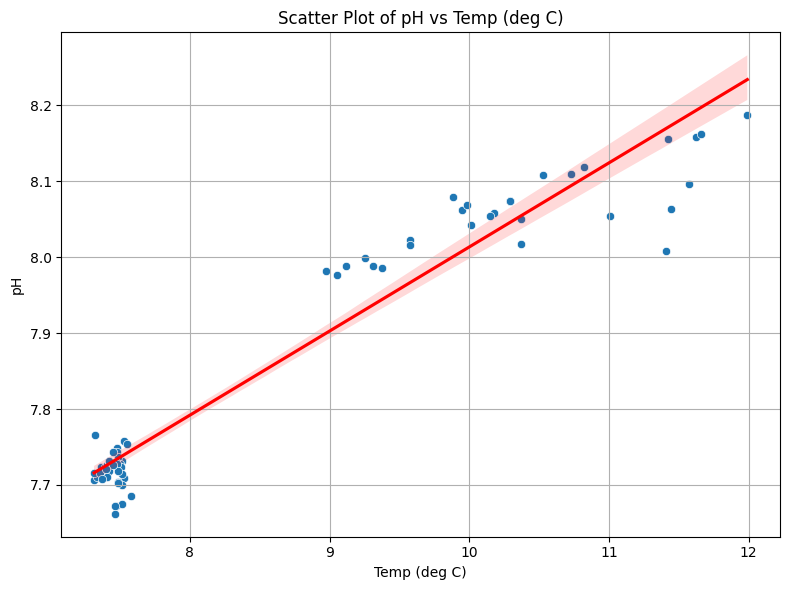

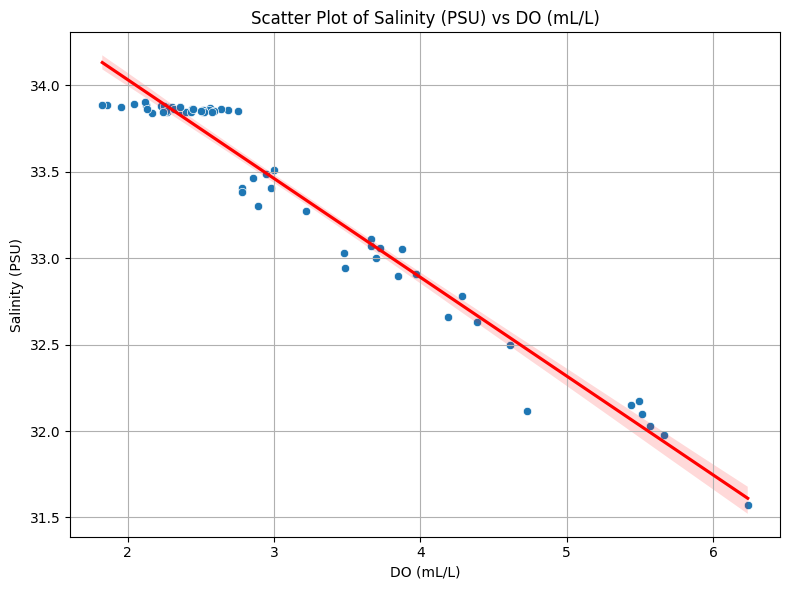

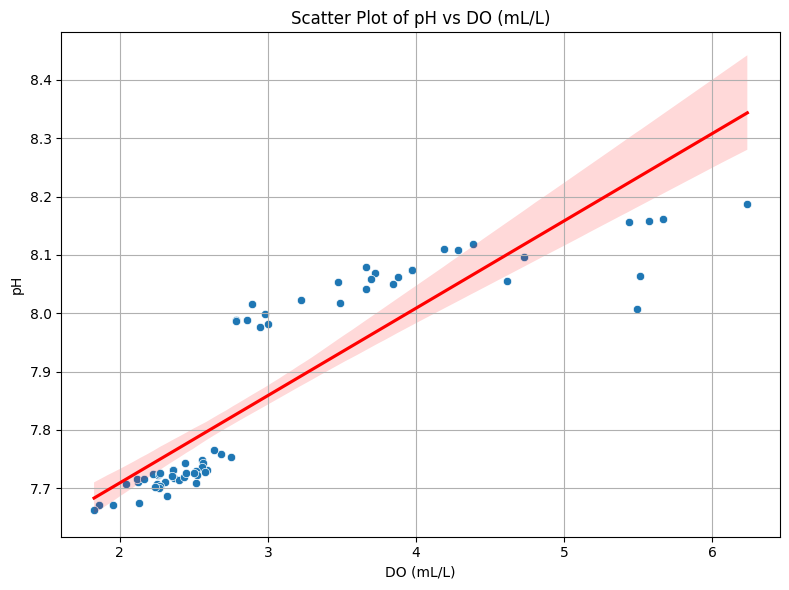

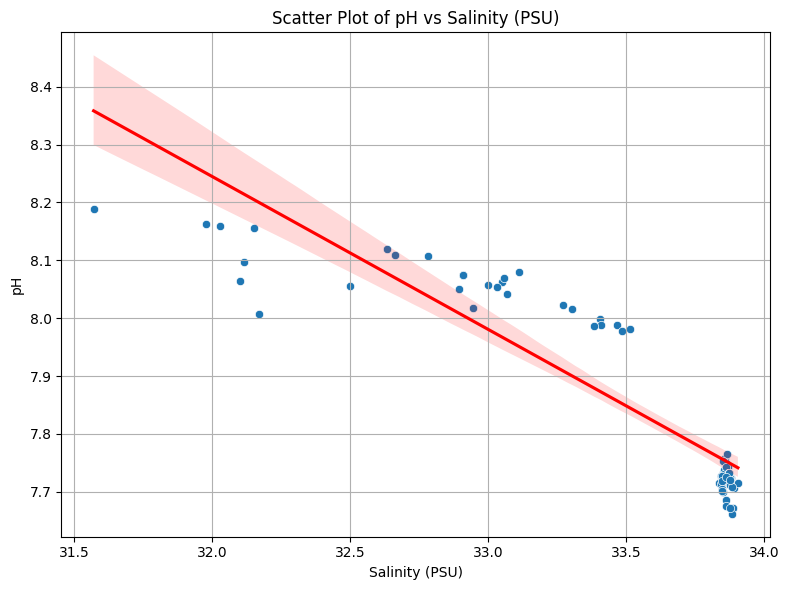

In [ ]:
features = ['Temp (deg C)', 'DO (mL/L)', 'Salinity (PSU)', 'pH']
n = len(features)

for i in range(n):
    for j in range(i + 1, n):
        plt.figure(figsize=(8, 6))
        x_feature = features[i]
        y_feature = features[j]

        # Scatter plot
        sns.scatterplot(data=data_2015, x=x_feature, y=y_feature)

        # Fit a regression line
        sns.regplot(data=data_2015, x=x_feature, y=y_feature, scatter=False, color='red')

        # Adding titles and labels
        plt.title(f'Scatter Plot of {y_feature} vs {x_feature}')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.grid()
        plt.tight_layout()

        # Show the plot
        plt.show()

### **Understanding of the Graph**

Each graph provides crucial insights into how two environmental parameters relate to each other in your dataset. Following are the understanding:


1. **DO vs Temp:** One can observe a trend wherein the DO concentration increases or decreases with a variation in temperature.
2. **Salinity vs Temp:** The change in temperature can be connected to salinity levels because of various reasons, such as evaporation or mixing of opposite water bodies.
3. **pH vs Temp:**pH varies with temperature for the majority of natural waters; warm water typically has a lower pH (is more acidic).
4. **DO vs Salinity:** Negative correlation, where higher salinity corresponds with lower DO levels, especially in marine systems.
5. **pH vs Salinity:** Salinity changes can alter pH levels, particularly in estuaries or coastal systems.
6. **DO vs pH:** In general, higher biological activity corresponds with higher pH and oxygen levels. Positive correlation can suggest an active photosynthesis ecosystem

Patterns, relationships, or trends uncovered by these graphs might aid you in your understanding of the aquatic habitat that you're exploring, signify intrinsic biological functions, and direct subsequent study or management. Do not forget to also consider statistical significance and context in drawing conclusions from these data!


**Lets plot the data into map and identify the location in which the information has been gathered. Interactive maps can convey complex spatial information intuitively, making data more accessible**

In [ ]:
geometry = [Point(xy) for xy in zip(data_2015[' Lon'], data_2015[' Lat'])]
env_data_gdf = gpd.GeoDataFrame(data_2015, geometry=geometry)

In [ ]:
avg_lat = data_2015[' Lat'].mean()
avg_lon = data_2015[' Lon'].mean()

In [ ]:
m = folium.Map(location=[avg_lon, avg_lat], zoom_start=6)

In [ ]:
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)
for idx, row in env_data_gdf.iterrows():
    folium.Marker(
        location=[row[' Lat'], row[' Lon']],
        popup=f"DO: {row['DO (mL/L)']}, Temp: {row['Temp (deg C)']}"
    ).add_to(m)

In [ ]:
m.save("map.html")

In [ ]:
m

## **Data Preprocessing**

To optimize the computational load and focus on pertinent analyses, we selected specific columns that are vital for predicting DO levels. We split the dataset into training (80%) and testing (20%) subsets to evaluate our models effectively without overfitting.

In [ ]:
features = data_2015[['Temp (deg C)', 'Salinity (PSU)', 'pH', 'Turbidity (NTU)']]
target = data_2015['DO (mL/L)']

In [ ]:
print('Features shape:', features.shape)
print('Target shape:', target.shape)

Features shape: (79, 4)
Target shape: (79,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [ ]:
print(f'Training features shape: {X_train.shape}, Training target shape: {y_train.shape}')
print(f'Testing features shape: {X_test.shape}, Testing target shape: {y_test.shape}')

Training features shape: (63, 4), Training target shape: (63,)
Testing features shape: (16, 4), Testing target shape: (16,)


## **Feature Scaling**

Scaling our features ensures that all variables contribute equally to the model's predictions, especially for algorithms sensitive to data scales. Feature scaling is crucial for improving the learning process and convergence speed of certain machine learning algorithms.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(f'Scaled training features shape: {X_train_scaled.shape}')
print(f'Scaled testing features shape: {X_test_scaled.shape}')

Scaled training features shape: (63, 4)
Scaled testing features shape: (16, 4)


## **Model Selection and Evaluation**

We will be conducting the model selection between 4 regression models i.e. Linear Regression, Decision Tree, Random Forest, Gradient Boosting to determine the best performer considering both the scaled and non-scaled datasets.

In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test, model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

In [ ]:
print("Non-Scaled Data Evaluation")
for model_name, model in models:
    evaluate_models(X_train, X_test, y_train, y_test, model_name, model)

Non-Scaled Data Evaluation
Linear Regression - MSE: 0.05, R2 Score: 0.95
Decision Tree - MSE: 0.06, R2 Score: 0.93
Random Forest - MSE: 0.05, R2 Score: 0.95
Gradient Boosting - MSE: 0.06, R2 Score: 0.93


In [ ]:
print("\nScaled Data Evaluation")
for model_name, model in models:
    evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model_name, model)


Scaled Data Evaluation
Linear Regression - MSE: 0.05, R2 Score: 0.95
Decision Tree - MSE: 0.06, R2 Score: 0.93
Random Forest - MSE: 0.05, R2 Score: 0.95
Gradient Boosting - MSE: 0.06, R2 Score: 0.93


## **Hyperparameter Tuning**

After determining the best-performing model will be from scaled data in which linear regression and Random forest since both have same output, we utilize hyperparameter tuning to potentially enhance its performance using Grind Search. After running the model we identified that in linear regression lasso regression was the best model with highest result.

In [ ]:
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_lasso_params = lasso_grid_search.best_params_
best_lasso_score = -lasso_grid_search.best_score_
print('Best Lasso parameters:', best_lasso_params)
print('Best Lasso score (MSE):', best_lasso_score)

Best Lasso parameters: {'alpha': 0.1}
Best Lasso score (MSE): 0.11878402128197244


In [ ]:
best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_model.fit(X_train, y_train)
lasso_y_pred = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
print('Lasso Regression - Test MSE:', lasso_mse)
print('Lasso Regression - Test R²:', lasso_r2)

Lasso Regression - Test MSE: 0.11950065345181285
Lasso Regression - Test R²: 0.8679983634362343


## **Conclusion**

In this project, we have performed intensive exploration and modeling of environmental data focusing on water quality predictor variables. Along the way, we adopted systematic methods for presenting complete analysis and accurate modeling, leading to meaningful conclusions.

**Key findings include:**

Lasso Rgression was identified as the best-performing algorithm during the evaluation phase, demonstrating superior prediction capabilities over the other regression models.By applying hyperparameter tuning, we could refine the model further, improving its overall performance.
This structured approach not only enhances our understanding of environmental factors affecting water quality but also provides a framework applicable to future datasets for similar analyses.